In [258]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import joblib
import warnings
warnings.filterwarnings("ignore")

In [259]:
df=pd.read_csv("Insurance_fraud.csv")

In [260]:
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [261]:
df.shape

(1000, 40)

In [262]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [264]:
df["_c39"].value_counts()

Series([], Name: _c39, dtype: int64)

In [265]:
#dropping the "_c39" column

In [266]:
df.drop("_c39",axis=1,inplace=True)

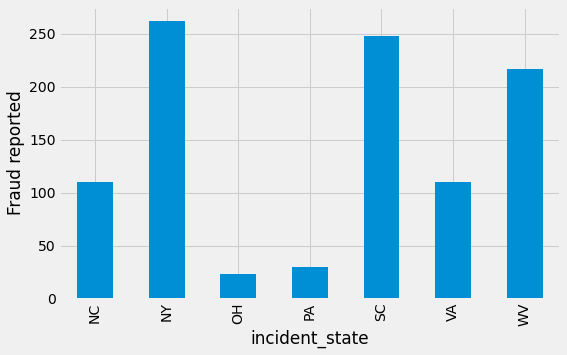

In [267]:
#bivariate analysis
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

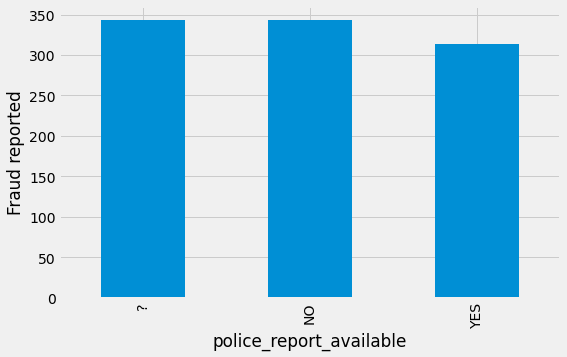

In [268]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
ax = df.groupby('police_report_available').Fraud reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

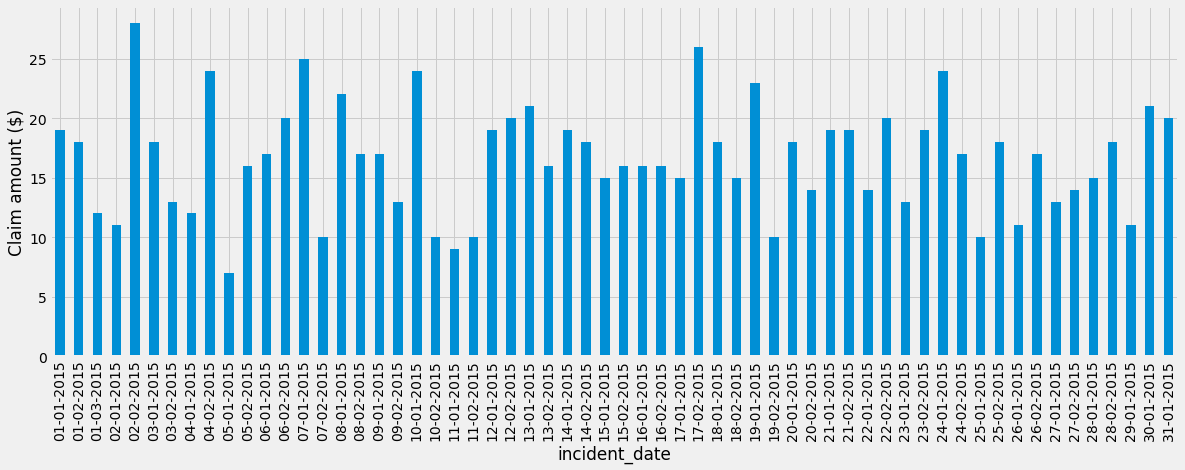

In [269]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

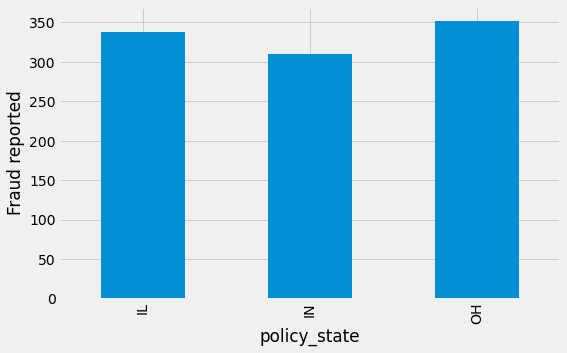

In [270]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

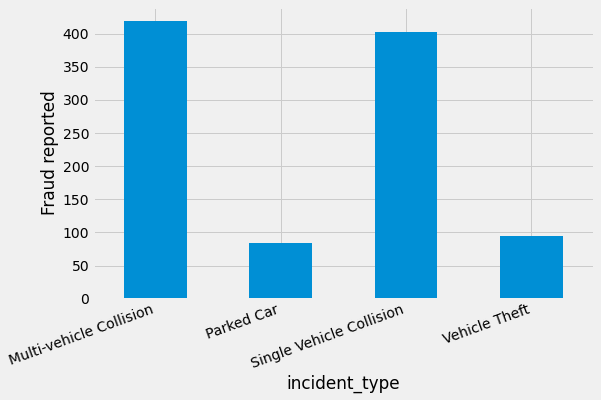

In [271]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

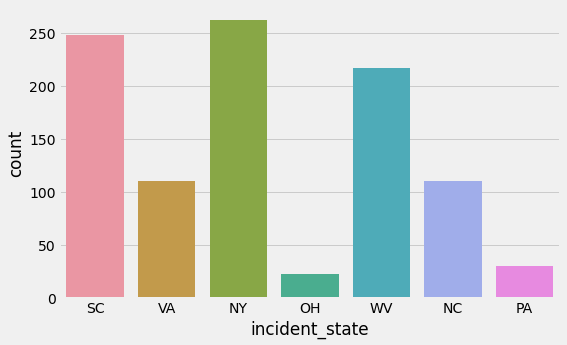

In [272]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(x='incident_state', data=df)

Text(0, 0.5, 'Fraud reported')

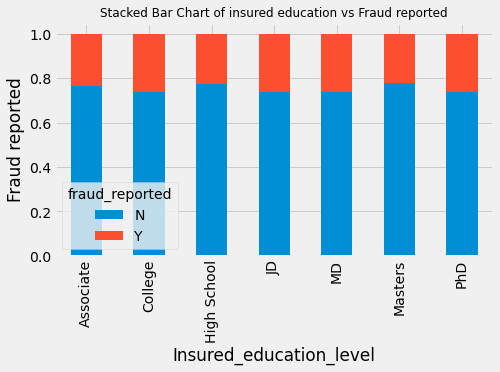

In [273]:
plt.rcParams['figure.figsize'] = [7, 4]
table=pd.crosstab(df.insured_education_level, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured education vs Fraud reported', fontsize=12)
plt.xlabel('Insured_education_level')
plt.ylabel('Fraud reported')

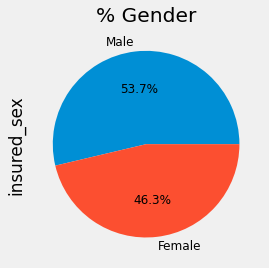

In [274]:
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

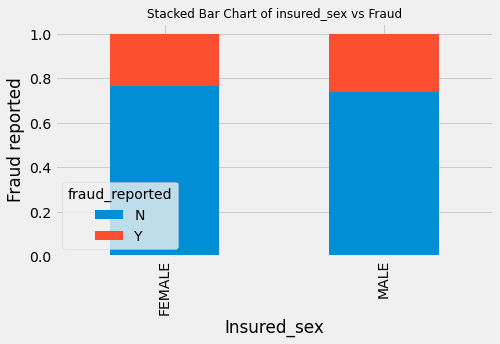

In [275]:
table=pd.crosstab(df.insured_sex, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_sex vs Fraud', fontsize=12)
plt.xlabel('Insured_sex')
plt.ylabel('Fraud reported')
plt.show()

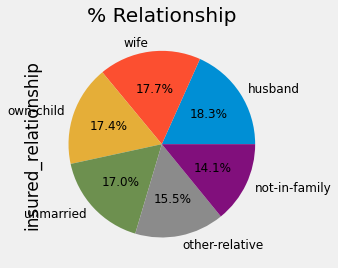

In [276]:
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

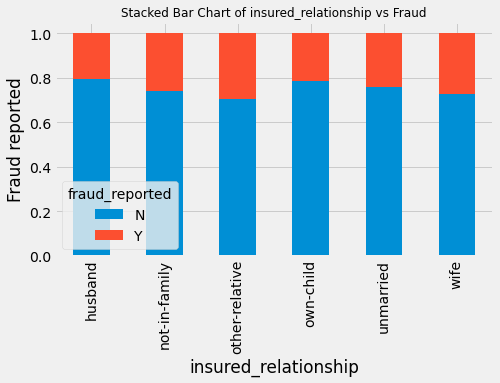

In [277]:
table=pd.crosstab(df.insured_relationship, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_relationship vs Fraud', fontsize=12)
plt.xlabel('insured_relationship')
plt.ylabel('Fraud reported')
plt.show()

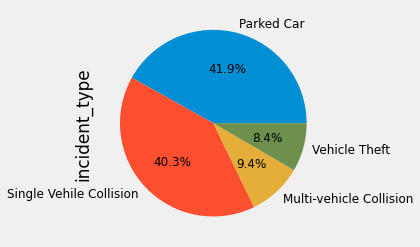

In [278]:
fig = plt.figure(figsize=(8,4))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],fontsize=12)

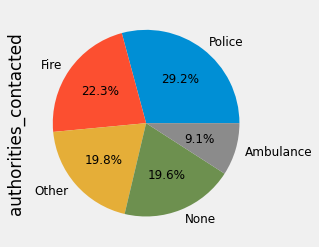

In [279]:
fig = plt.figure(figsize=(8,4))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],fontsize=12)

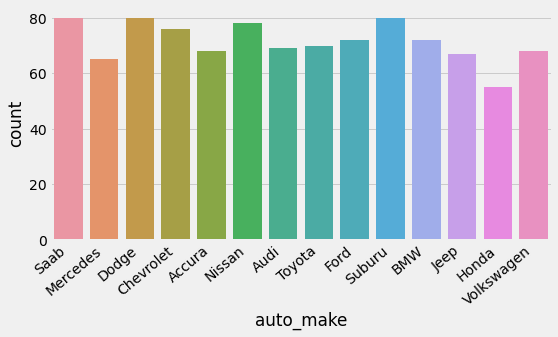

In [280]:
fig = plt.figure(figsize=(8,4))
ax = sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

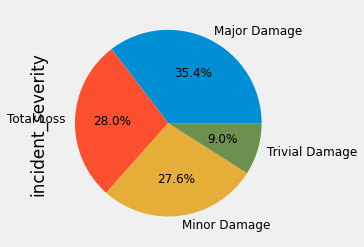

In [281]:
fig = plt.figure(figsize=(8,4))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],fontsize=12)

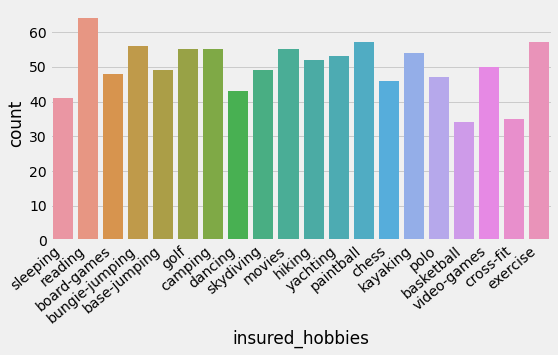

In [282]:
fig = plt.figure(figsize=(8,4))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [284]:
df["months_as_customer"].value_counts()

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64

In [285]:
df["policy_bind_date"].value_counts()

01-01-2006    3
28-04-1992    3
05-08-1992    3
20-07-1991    2
16-05-2008    2
             ..
12-01-2012    1
03-02-2008    1
21-07-1996    1
18-07-2002    1
12-10-2006    1
Name: policy_bind_date, Length: 951, dtype: int64

In [286]:
df.policy_bind_date = pd.to_datetime(df.policy_bind_date)

In [287]:
df["months"]=df["policy_bind_date"].dt.month

In [288]:
df["days"]=df["policy_bind_date"].dt.day

In [289]:
df["years"]=df["policy_bind_date"].dt.year

In [290]:
df.drop("policy_bind_date",axis=1,inplace=True)

The date column has been segregated to days, months and years

In [291]:
df.head(5)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months,days,years
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,6510,13020,52080,Saab,92x,2004,Y,10,17,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,780,3510,Mercedes,E400,2007,Y,6,27,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,25,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1300,650,4550,Accura,RSX,2009,N,6,6,2014


In [292]:
df["policy_state"].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [293]:
LE = LabelEncoder()
df["policy_state"]=LE.fit_transform(df["policy_state"])

In [294]:
df["policy_state"].value_counts()

2    352
0    338
1    310
Name: policy_state, dtype: int64

In [295]:
df["policy_csl"].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [296]:
df = df.replace('?',np.NaN)

df.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                 True
b

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   int32  
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [298]:
df["police_report_available"].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [299]:
df["property_damage"].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [300]:
df["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [301]:
#missing value treatment using fillna

# we will replace the '?' by the most common collision type as we are unaware of the type.
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)

# It may be the case that there are no responses for property damage then we might take it as No property damage.
df['property_damage'].fillna('NO', inplace = True)

# again, if there are no responses fpr police report available then we might take it as No report available
df['police_report_available'].fillna('NO', inplace = True)

df.isnull().any().any()

False

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   int32  
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [303]:
df["policy_csl"].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [304]:
LE = LabelEncoder()
df["policy_csl"]=LE.fit_transform(df["policy_csl"])

In [305]:
df["insured_sex"].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [306]:
df["insured_sex"]=LE.fit_transform(df["insured_sex"])

In [307]:
df["insured_sex"].value_counts()

0    537
1    463
Name: insured_sex, dtype: int64

In [308]:
df["insured_education_level"].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [309]:
df["insured_education_level"]=LE.fit_transform(df["insured_education_level"])

In [310]:
df["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [311]:
df["insured_hobbies"].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
camping           55
golf              55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [312]:
df["insured_relationship"].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [313]:
#df["incident_date"].value_counts()

In [314]:
df = df.drop(['incident_date','incident_location','auto_model'], axis = 1)


In [315]:
#dropping this unneccessary columns

In [316]:
df["incident_type"].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [317]:
df["collision_type"].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [318]:
columnss=["incident_severity","fraud_reported","authorities_contacted","incident_state","incident_city","property_damage","police_report_available","auto_make","auto_year"]

for i in columnss:
    print(df[i].value_counts())

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64
N    753
Y    247
Name: fraud_reported, dtype: int64
Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64
Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64
NO     698
YES    302
Name: property_damage, dtype: int64
NO     686
YES    314
Name: police_report_available, dtype: int64
Saab          80
Suburu        80
Dodge         80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64
1995    56
1999    55
2005    

Applied for loop to check all the object dtype columns

In [319]:
columnss=["collision_type","incident_type","fraud_reported","insured_occupation","insured_hobbies","insured_relationship","incident_severity","authorities_contacted","incident_state","incident_city","property_damage","police_report_available","auto_make","auto_year"]

for i in columnss:
    df[i]=LE.fit_transform(df[i])

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   int32  
 4   policy_csl                   1000 non-null   int32  
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int32  
 11  insured_occupation           1000 non-null   int32  
 12  insured_hobbies              1000 non-null   int32  
 13  insured_relationshi

label encoding has been applied to all the columns and now the dtype for all the columns is int or either float

<AxesSubplot:>

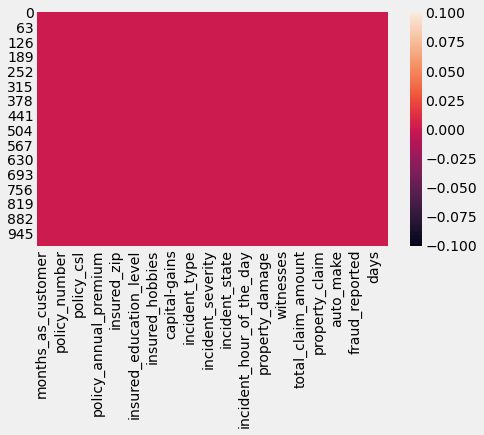

In [321]:
sns.heatmap(df.isnull())

In [322]:
df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,months,days,years
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,10.103000,0.247000,6.559000,15.448000,2001.604000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,6.015861,0.431483,3.391758,8.850176,7.360391
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1990.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,5.000000,0.000000,4.000000,8.000000,1995.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,10.000000,0.000000,7.000000,16.000000,2002.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,15.000000,0.000000,9.000000,23.000000,2008.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,20.000000,1.000000,12.000000,31.000000,2015.000000


numerical column decription

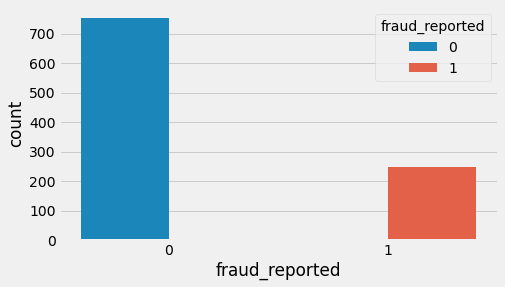

In [323]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

In [324]:
#class imbalance problem

<AxesSubplot:>

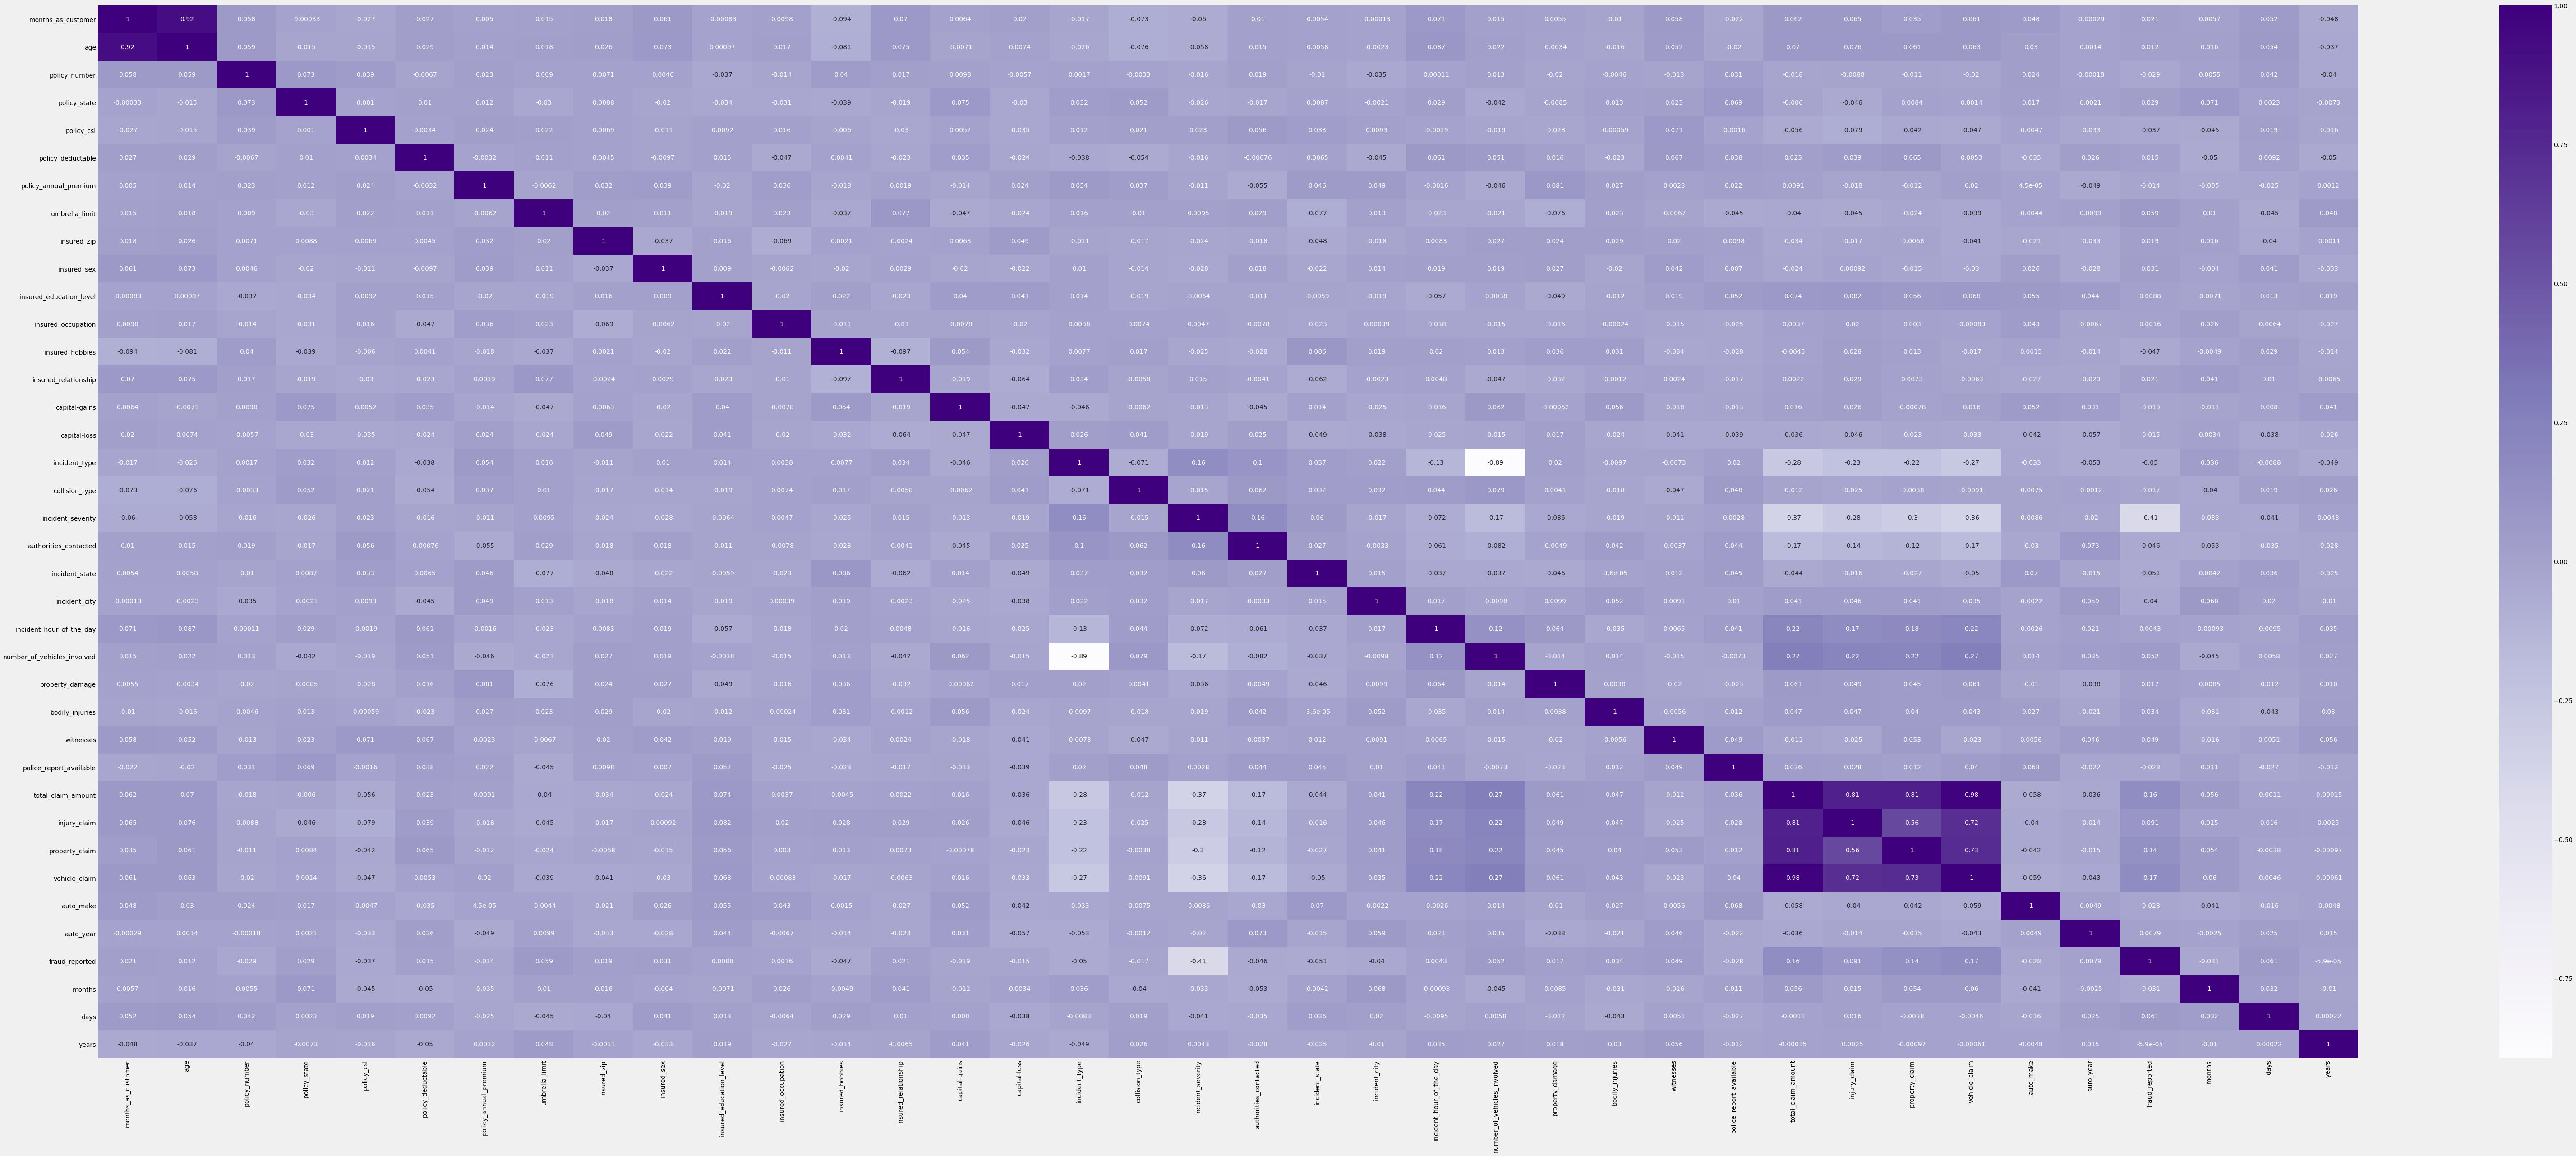

In [325]:
fig=plt.figure(figsize=(100,40))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Purples")

In [326]:
df_corrr=df.corr()
df_corrr

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,months,days,years
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.062108,0.065329,0.034940,0.061013,0.047655,-0.000292,0.020544,0.005750,0.051728,-0.048276
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.069863,0.075522,0.060898,0.062588,0.030410,0.001354,0.012143,0.015501,0.053869,-0.037444
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,...,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,-0.000183,-0.029443,0.005509,0.041885,-0.040099
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,-0.006002,-0.046290,0.008406,0.001425,0.017124,0.002114,0.029432,0.071450,0.002277,-0.007276
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,-0.033082,-0.037190,-0.045345,0.018973,-0.016466
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,0.022839,0.039107,0.064792,0.005269,-0.035379,0.026105,0.014817,-0.050416,0.009164,-0.049598
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.049226,-0.014480,-0.035355,-0.025183,0.001249
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.009893,0.058622,0.009961,-0.045207,0.048008
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,-0.032736,0.019368,0.015864,-0.039867,-0.001100
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.028247,0.030873,-0.004033,0.040713,-0.032891


In [327]:
#correlation of column with each other

<Figure size 504x288 with 0 Axes>

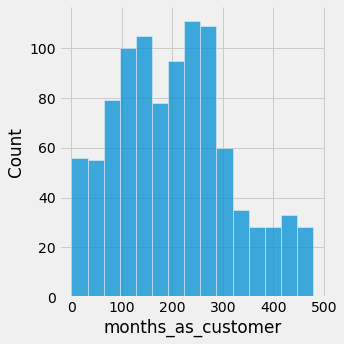

<Figure size 504x288 with 0 Axes>

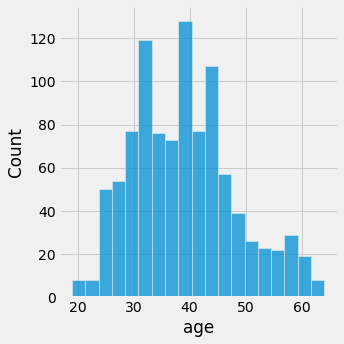

<Figure size 504x288 with 0 Axes>

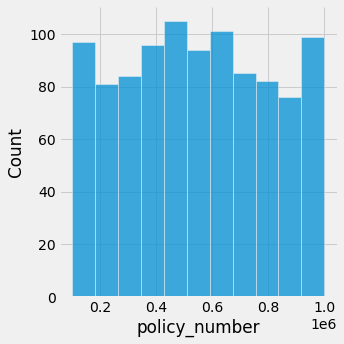

<Figure size 504x288 with 0 Axes>

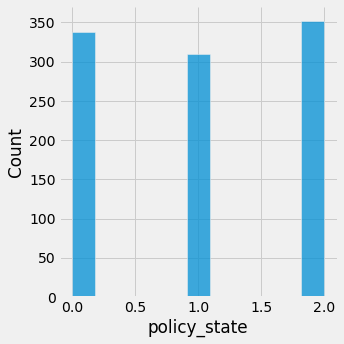

<Figure size 504x288 with 0 Axes>

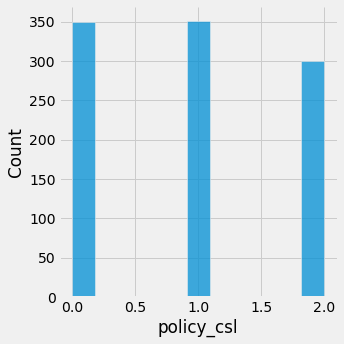

<Figure size 504x288 with 0 Axes>

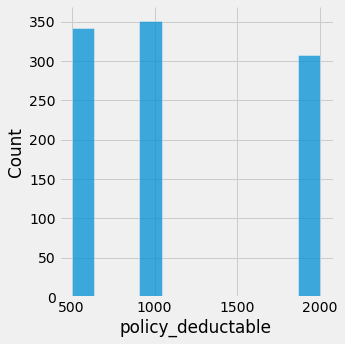

<Figure size 504x288 with 0 Axes>

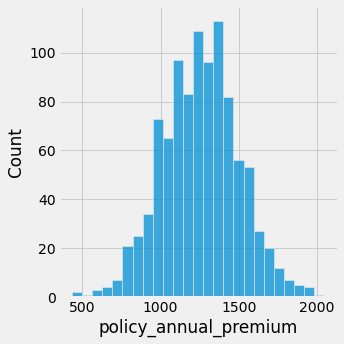

<Figure size 504x288 with 0 Axes>

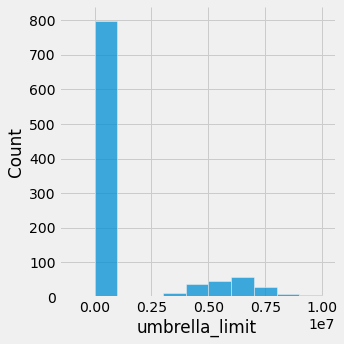

<Figure size 504x288 with 0 Axes>

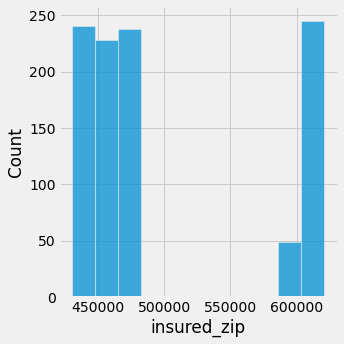

<Figure size 504x288 with 0 Axes>

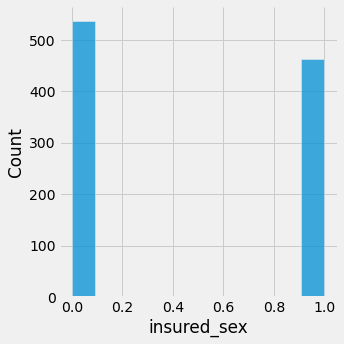

<Figure size 504x288 with 0 Axes>

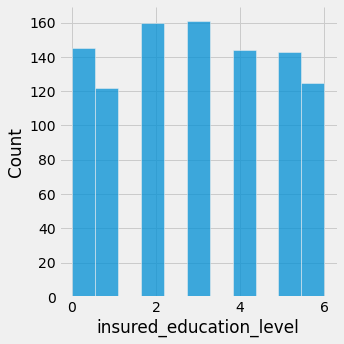

<Figure size 504x288 with 0 Axes>

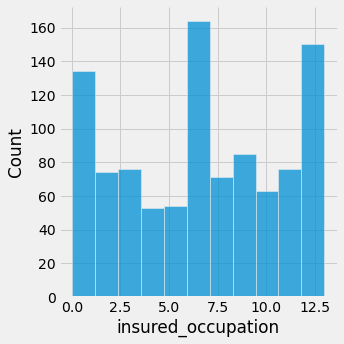

<Figure size 504x288 with 0 Axes>

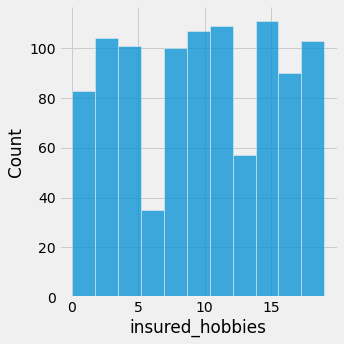

<Figure size 504x288 with 0 Axes>

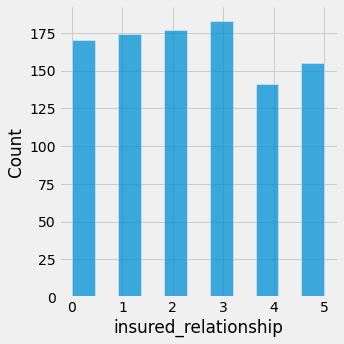

<Figure size 504x288 with 0 Axes>

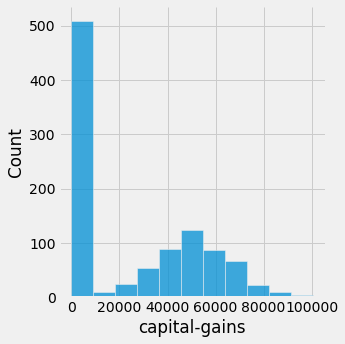

<Figure size 504x288 with 0 Axes>

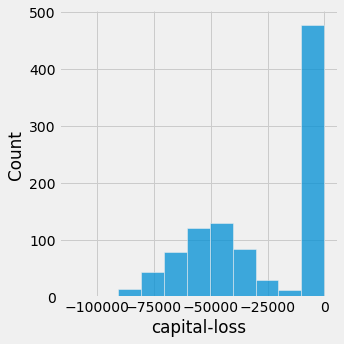

<Figure size 504x288 with 0 Axes>

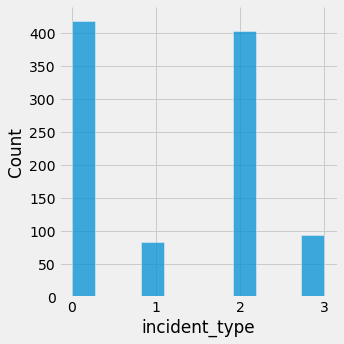

<Figure size 504x288 with 0 Axes>

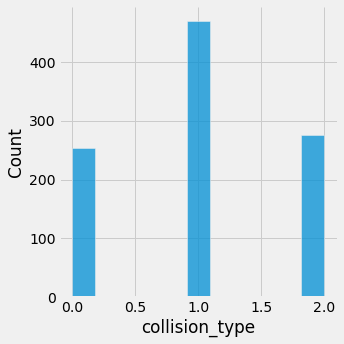

<Figure size 504x288 with 0 Axes>

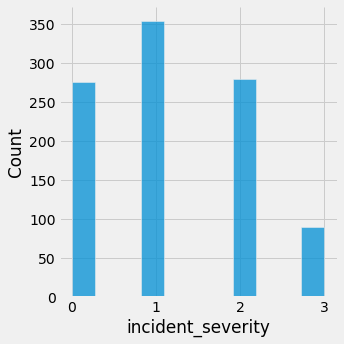

<Figure size 504x288 with 0 Axes>

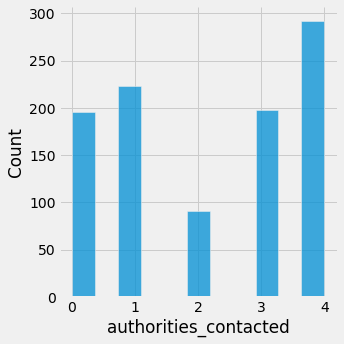

<Figure size 504x288 with 0 Axes>

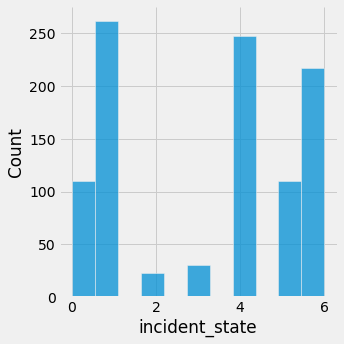

<Figure size 504x288 with 0 Axes>

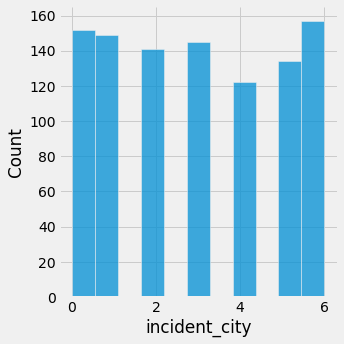

<Figure size 504x288 with 0 Axes>

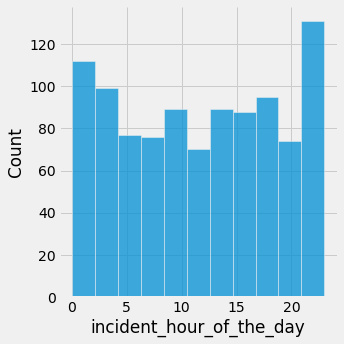

<Figure size 504x288 with 0 Axes>

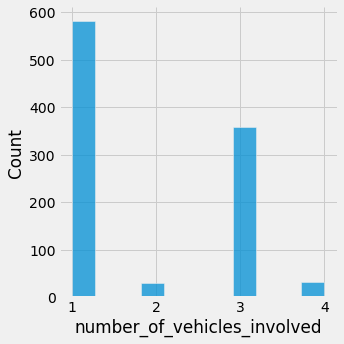

<Figure size 504x288 with 0 Axes>

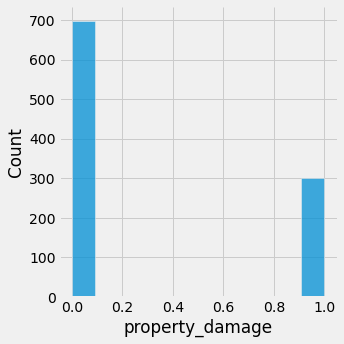

<Figure size 504x288 with 0 Axes>

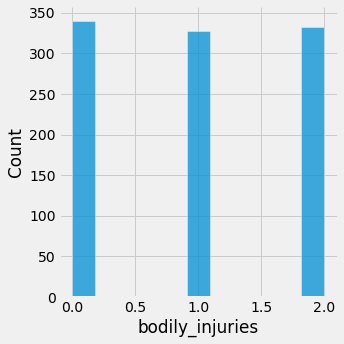

<Figure size 504x288 with 0 Axes>

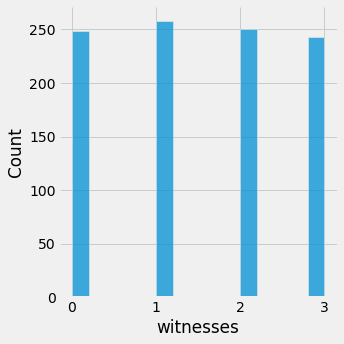

<Figure size 504x288 with 0 Axes>

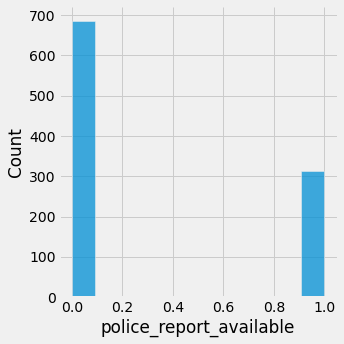

<Figure size 504x288 with 0 Axes>

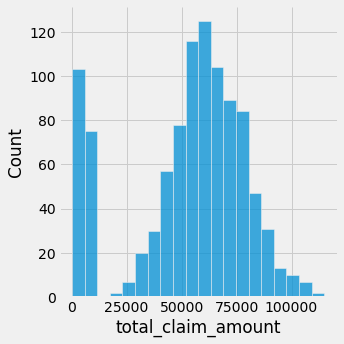

<Figure size 504x288 with 0 Axes>

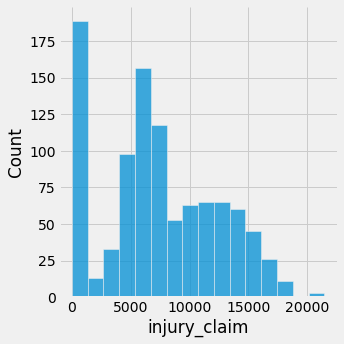

<Figure size 504x288 with 0 Axes>

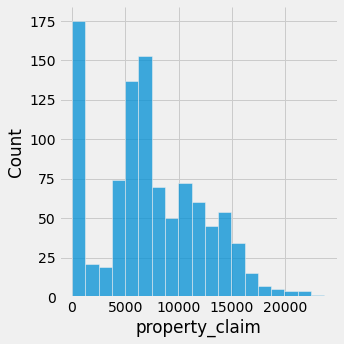

<Figure size 504x288 with 0 Axes>

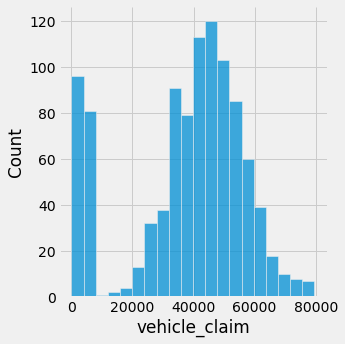

<Figure size 504x288 with 0 Axes>

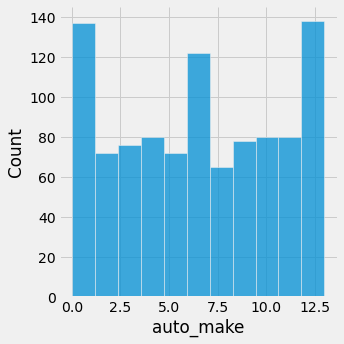

<Figure size 504x288 with 0 Axes>

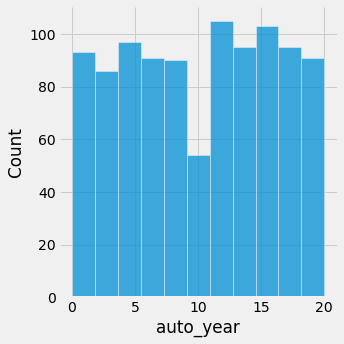

<Figure size 504x288 with 0 Axes>

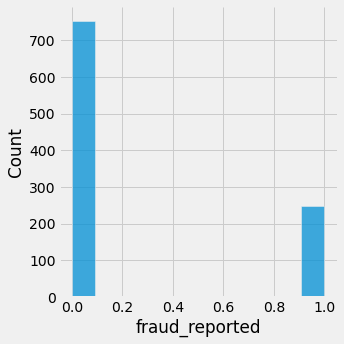

<Figure size 504x288 with 0 Axes>

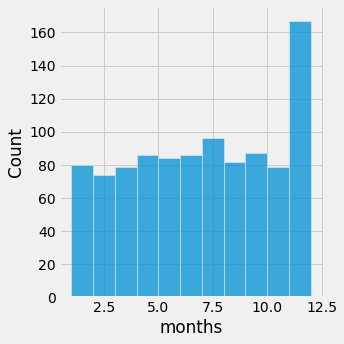

<Figure size 504x288 with 0 Axes>

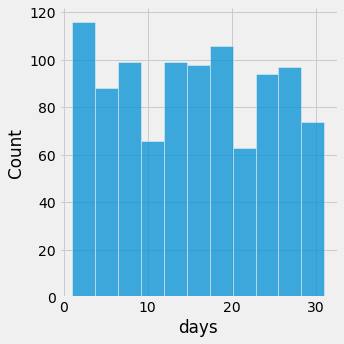

<Figure size 504x288 with 0 Axes>

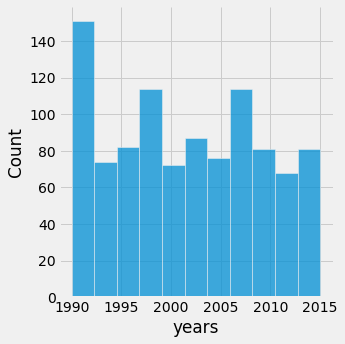

In [328]:
columns=df.columns

for i in df[columns]:
    plt.figure()
    sns.displot(df[i])

In [329]:
#distribution plot for all the column

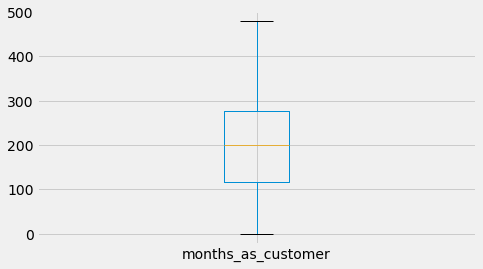

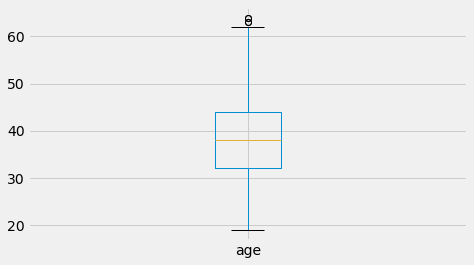

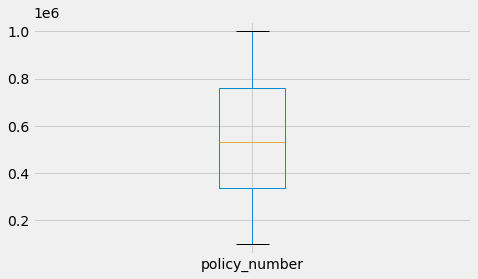

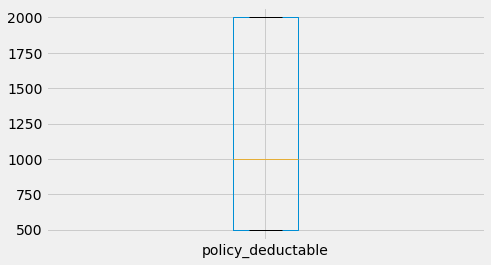

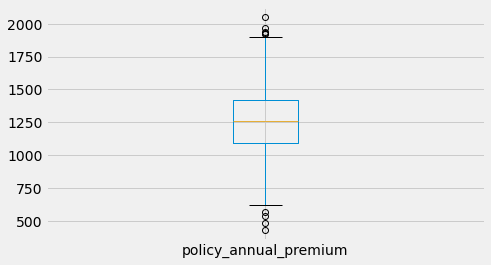

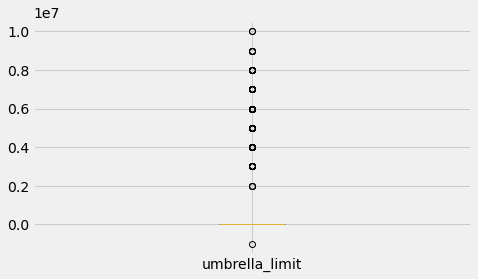

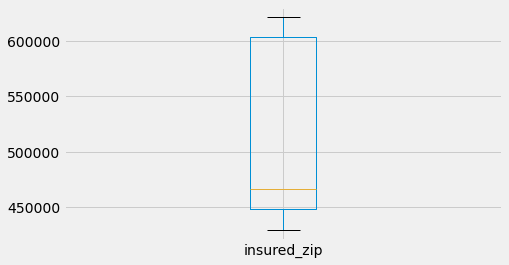

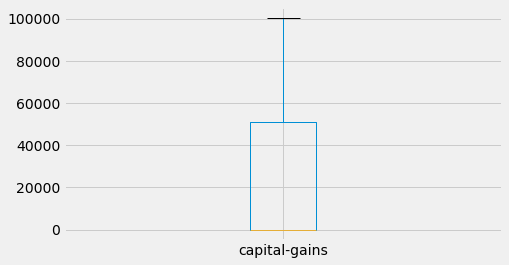

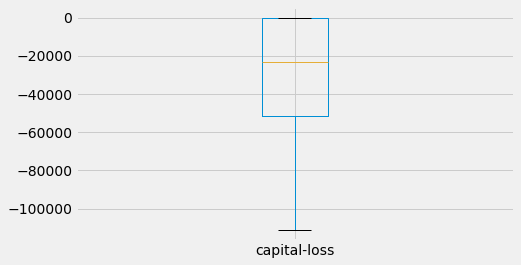

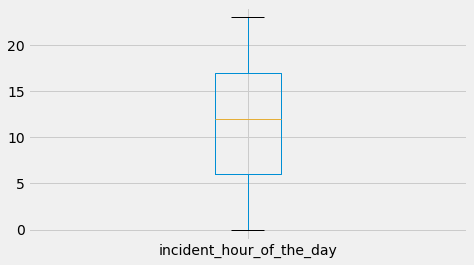

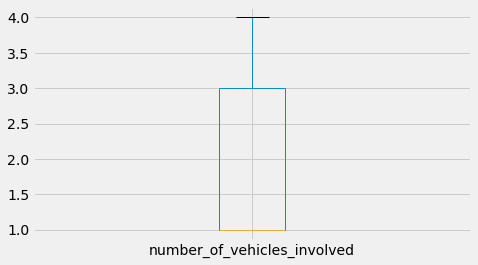

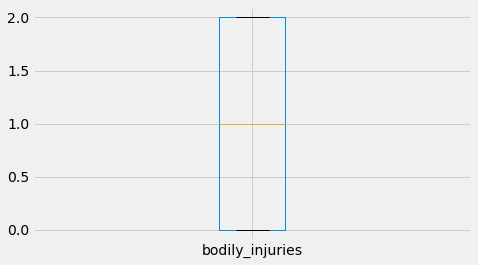

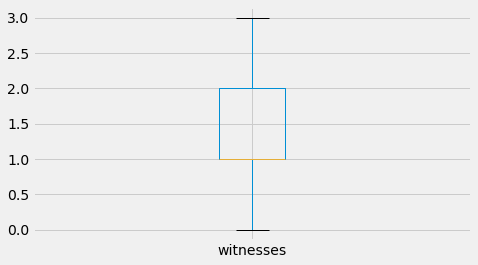

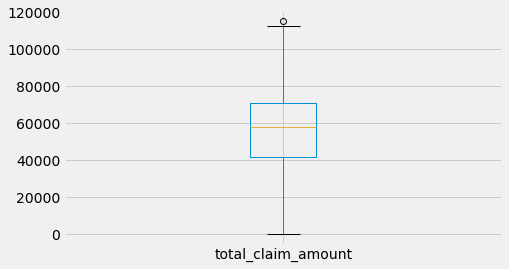

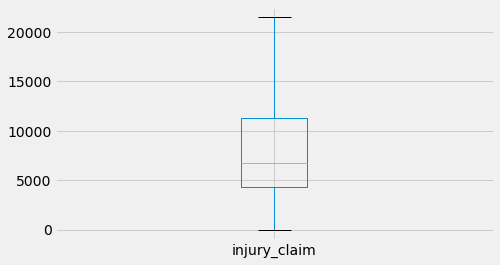

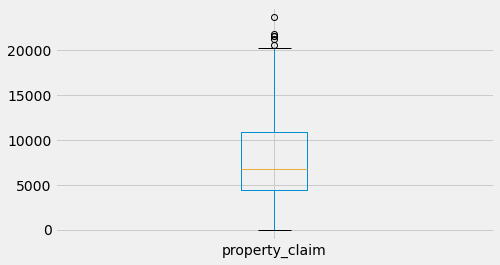

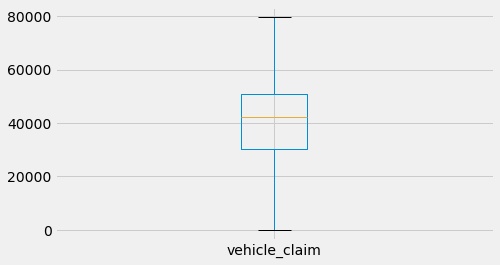

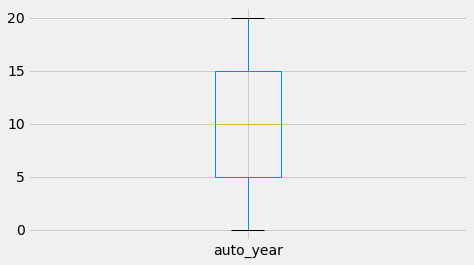

In [330]:
columns=["months_as_customer","age","policy_number","policy_deductable","policy_annual_premium","umbrella_limit","insured_zip","capital-gains","capital-loss","incident_hour_of_the_day","number_of_vehicles_involved","bodily_injuries","witnesses","total_claim_amount","injury_claim","property_claim","vehicle_claim","auto_year"]

for i in df[columns]:
    plt.figure()
    df[i].plot.box()

In [331]:
#boxplot to check the outliers present in the numerical columns
#there are outliers present in the age,policy_annual_premium,umbrella_limit,total_claim_amount,property_claim
#outliers to be treated of policy_annual_premium,umbrella_limit,total_claim_amount

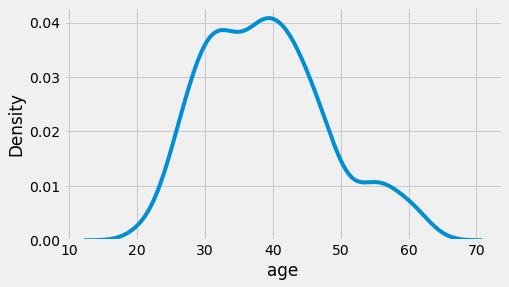

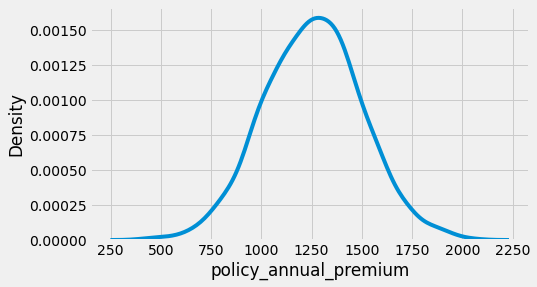

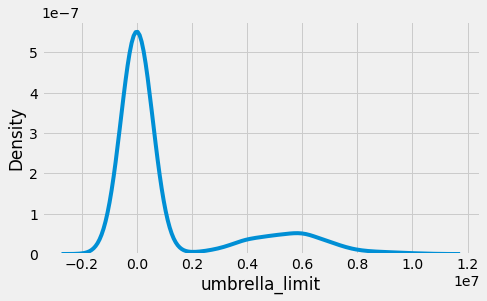

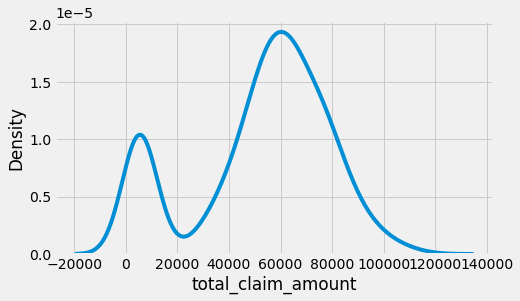

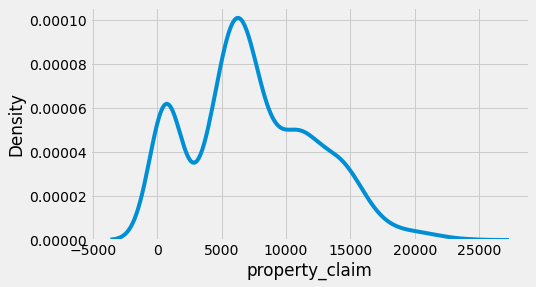

In [332]:
columns=["age","policy_annual_premium","umbrella_limit","total_claim_amount","property_claim"]

for i in df[columns]:
    plt.figure()
    sns.kdeplot(df[i])

In [333]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806


In [334]:
#sns.pairplot(df)

In [335]:
from scipy.stats import zscore

In [336]:
df1=df[["policy_annual_premium","umbrella_limit","total_claim_amount"]]
z=np.abs(zscore(df1))
df_new=df[(z<3).all(axis=1)]

In [337]:
print("shape before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new.shape)
print("pecentage loss".ljust(20),":",(df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before         : (1000, 38)
shape after          : (982, 38)
pecentage loss       : 0.018


In [338]:
#OUTLIERS HAVE BEEN REMOVED AND THERE IS 0.018% DTATA LOSS 

In [339]:
q1=df1.quantile(0.25)
q3=df1.quantile(0.75)
IQR=q3-q1

In [340]:
df_new1=df[~((df1<(q1-1.5*IQR)) |(df1>(q3+1.5*IQR))).any(axis=1)]

In [341]:
print("shape before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new1.shape)
print("pecentage loss".ljust(20),":",(df.shape[0]-df_new1.shape[0])/df.shape[0])

shape before and after
shape before         : (1000, 38)
shape after          : (790, 38)
pecentage loss       : 0.21


# OUTLIERS HAVE BEEN REMOVED THROUGH IQR AND THERE IS 0.21% DTATA LOSS SO WE WILL GO THROUGH THE ZSCORE HERE THERE IS LESS DATA LOSS 

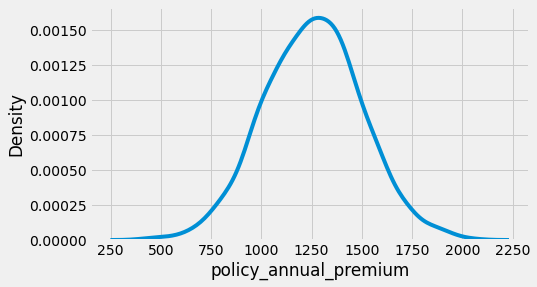

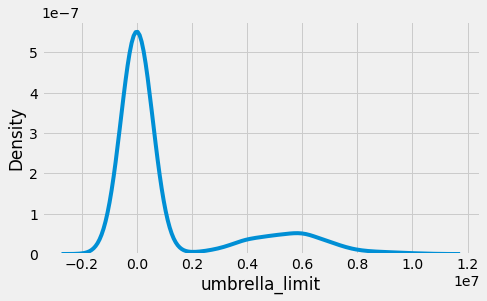

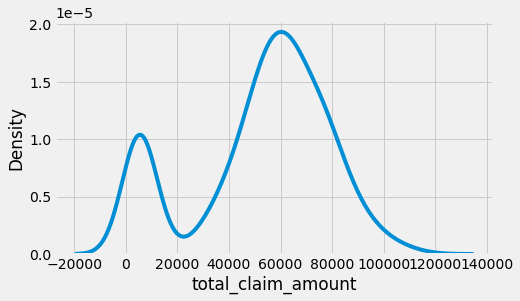

In [342]:
columns=["policy_annual_premium","umbrella_limit","total_claim_amount"]

for i in df[columns]:
    plt.figure()
    sns.kdeplot(df[i])

In [346]:
x=df_new.drop("fraud_reported",axis=1)
y=df_new["fraud_reported"]

In [347]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

X=pd.DataFrame(x,columns=x.columns)
X

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,months,days,years
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,1,71610,6510,13020,52080,10,9,10,17,2014
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,5070,780,780,3510,8,12,6,27,2006
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,0,34650,7700,3850,23100,4,12,6,9,2000
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,0,63400,6340,6340,50720,3,19,5,25,1990
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,0,6500,1300,650,4550,0,14,6,6,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,...,0,87200,17440,8720,61040,6,11,7,16,1991
996,285,41,186934,0,0,1000,1436.79,0,608177,0,...,0,108480,18080,18080,72320,13,20,5,1,2014
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,1,67500,7500,7500,52500,11,1,2,17,2003
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,...,1,46980,5220,5220,36540,1,3,11,18,2011


In [348]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is ",maxAccu," on Random sate ",maxRS)

best accuracy is  0.8101694915254237  on Random sate  170


In [350]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=170)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(687, 37)
(295, 37)
(687,)
(295,)


In [351]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy score:
0.7186440677966102
[[201  36]
 [ 47  11]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       237
           1       0.23      0.19      0.21        58

    accuracy                           0.72       295
   macro avg       0.52      0.52      0.52       295
weighted avg       0.70      0.72      0.71       295



In [352]:
sv=SVC()
sv.fit(x_train,y_train)
pred2=sv.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

accuracy score:
0.8033898305084746
[[237   0]
 [ 58   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       237
           1       0.00      0.00      0.00        58

    accuracy                           0.80       295
   macro avg       0.40      0.50      0.45       295
weighted avg       0.65      0.80      0.72       295



In [353]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred3=rf.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))

accuracy score:
0.7932203389830509
[[216  21]
 [ 40  18]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       237
           1       0.46      0.31      0.37        58

    accuracy                           0.79       295
   macro avg       0.65      0.61      0.62       295
weighted avg       0.77      0.79      0.78       295



In [354]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred4=ad.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred4))
print(confusion_matrix(y_test,pred4))
print(classification_report(y_test,pred4))

accuracy score:
0.8203389830508474
[[212  25]
 [ 28  30]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       237
           1       0.55      0.52      0.53        58

    accuracy                           0.82       295
   macro avg       0.71      0.71      0.71       295
weighted avg       0.82      0.82      0.82       295



In [355]:
#APPLYING CROSS VALIDATION
score=cross_val_score(LR,X,y,cv=5)
print(score)
print("/n")
print(score.mean())

[0.75634518 0.76142132 0.74489796 0.75510204 0.75510204]
/n
0.7545737076556509


In [356]:
score=cross_val_score(gnb,X,y,cv=5)
print(score)
print(score.mean())

[0.72588832 0.62944162 0.56122449 0.7244898  0.69897959]
0.6680047653579197


In [357]:
score=cross_val_score(sv,X,y,cv=5)
print(score)
print(score.mean())

[0.75634518 0.75634518 0.75510204 0.75510204 0.75510204]
0.7555992955557856


In [358]:
score=cross_val_score(rf,X,y,cv=5)
print(score)
print(score.mean())

[0.79187817 0.76649746 0.76530612 0.78061224 0.78061224]
0.776981249352533


In [359]:
score=cross_val_score(ad,X,y,cv=5)
print(score)
print(score.mean())

[0.8071066  0.75634518 0.76530612 0.83673469 0.84183673]
0.8014658655340309


In [360]:
#after checking the difference of model accuracy and cross validation the best performing model is adaboostclassifier

In [361]:
print(confusion_matrix(y_test,pred4))

[[212  25]
 [ 28  30]]


In [362]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       237
           1       0.55      0.52      0.53        58

    accuracy                           0.82       295
   macro avg       0.71      0.71      0.71       295
weighted avg       0.82      0.82      0.82       295



In [363]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [364]:
y_pred_prob=ad.predict_proba(x_test)[:,1]

In [365]:
y_pred_prob

array([0.48782527, 0.50780796, 0.49722829, 0.49580194, 0.49723784,
       0.48886687, 0.48908389, 0.49000661, 0.49301082, 0.50438336,
       0.49425537, 0.50149066, 0.48350521, 0.4979868 , 0.49758054,
       0.49814933, 0.48940239, 0.48222842, 0.49825916, 0.47499742,
       0.49665651, 0.48543391, 0.48467015, 0.49889777, 0.49120671,
       0.49478549, 0.48548722, 0.49438498, 0.4941689 , 0.49377105,
       0.50547254, 0.48951624, 0.50103299, 0.4884625 , 0.49157179,
       0.49172351, 0.49157968, 0.49255956, 0.49479191, 0.48583039,
       0.48039484, 0.50036709, 0.49858036, 0.49284129, 0.49408037,
       0.47730864, 0.49328055, 0.49932001, 0.4924356 , 0.48753368,
       0.4862817 , 0.49664218, 0.49199822, 0.49215594, 0.49708149,
       0.47534334, 0.48268425, 0.4952538 , 0.49938308, 0.48762425,
       0.50229354, 0.49231074, 0.48188956, 0.48242735, 0.48907958,
       0.48895798, 0.4959805 , 0.49995241, 0.48635054, 0.50014265,
       0.49527153, 0.49269825, 0.48717507, 0.48839473, 0.49465

In [366]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [367]:
fpr

array([0.        , 0.00421941, 0.00843882, 0.00843882, 0.01687764,
       0.01687764, 0.02531646, 0.02531646, 0.03375527, 0.03375527,
       0.04219409, 0.04219409, 0.0464135 , 0.0464135 , 0.05063291,
       0.05063291, 0.05907173, 0.05907173, 0.06329114, 0.06329114,
       0.07172996, 0.07172996, 0.07594937, 0.07594937, 0.08438819,
       0.08438819, 0.08860759, 0.08860759, 0.11814346, 0.11814346,
       0.13924051, 0.13924051, 0.14345992, 0.14345992, 0.15189873,
       0.15189873, 0.16455696, 0.16455696, 0.17299578, 0.17299578,
       0.18565401, 0.18565401, 0.20253165, 0.20253165, 0.20675105,
       0.20675105, 0.21940928, 0.21940928, 0.2278481 , 0.2278481 ,
       0.23628692, 0.23628692, 0.24472574, 0.24472574, 0.25738397,
       0.25738397, 0.26160338, 0.26160338, 0.28270042, 0.28270042,
       0.35021097, 0.35021097, 0.35443038, 0.35443038, 0.37552743,
       0.37552743, 0.47257384, 0.47257384, 0.50632911, 0.50632911,
       0.76371308, 0.76371308, 0.81012658, 0.81012658, 0.94936

In [368]:
tpr

array([0.        , 0.        , 0.        , 0.01724138, 0.01724138,
       0.0862069 , 0.0862069 , 0.20689655, 0.20689655, 0.22413793,
       0.22413793, 0.24137931, 0.24137931, 0.32758621, 0.32758621,
       0.36206897, 0.36206897, 0.39655172, 0.39655172, 0.4137931 ,
       0.4137931 , 0.44827586, 0.44827586, 0.48275862, 0.48275862,
       0.5       , 0.5       , 0.51724138, 0.51724138, 0.55172414,
       0.55172414, 0.56896552, 0.56896552, 0.5862069 , 0.5862069 ,
       0.60344828, 0.60344828, 0.62068966, 0.62068966, 0.63793103,
       0.63793103, 0.65517241, 0.65517241, 0.67241379, 0.67241379,
       0.68965517, 0.68965517, 0.70689655, 0.70689655, 0.74137931,
       0.74137931, 0.75862069, 0.75862069, 0.77586207, 0.77586207,
       0.81034483, 0.81034483, 0.82758621, 0.82758621, 0.84482759,
       0.84482759, 0.86206897, 0.86206897, 0.87931034, 0.87931034,
       0.89655172, 0.89655172, 0.9137931 , 0.9137931 , 0.93103448,
       0.93103448, 0.94827586, 0.94827586, 0.96551724, 0.96551

In [369]:
thresholds

array([1.51566091, 0.51566091, 0.51497837, 0.51360404, 0.51007325,
       0.50556183, 0.5053551 , 0.50438336, 0.50429355, 0.50423786,
       0.50352555, 0.50341074, 0.5033556 , 0.50243158, 0.50229354,
       0.50184098, 0.50175186, 0.5016004 , 0.50152996, 0.50149929,
       0.50138289, 0.50103299, 0.50098116, 0.50071214, 0.50046467,
       0.50036709, 0.50032643, 0.50031548, 0.49954787, 0.49938308,
       0.49895773, 0.49894   , 0.49892485, 0.49892406, 0.49858036,
       0.49856421, 0.49825916, 0.49814933, 0.4979868 , 0.49785343,
       0.49751656, 0.49737462, 0.49708149, 0.49700414, 0.49677542,
       0.49669698, 0.49663682, 0.49651098, 0.49637672, 0.49620586,
       0.49609806, 0.49607905, 0.4959805 , 0.49580194, 0.49528079,
       0.4952538 , 0.49516725, 0.49514927, 0.49478549, 0.49477959,
       0.49384387, 0.49378279, 0.49377105, 0.49375663, 0.4930833 ,
       0.49306606, 0.49201766, 0.49199822, 0.49141373, 0.49138034,
       0.48697279, 0.48682577, 0.48620166, 0.4861936 , 0.48268

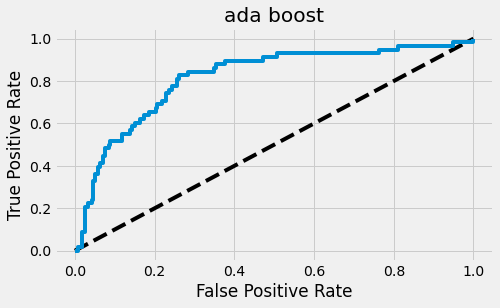

In [370]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="ada boost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ada boost")
plt.show()

In [371]:
#AUC ROC CURVE

In [372]:
import joblib
joblib.dump(ad,"Insurance_Fraud.obj")
print("object of the dataset has been created")

object of the dataset has been created
